ARTI406 - Machine Learning

# Assignment 1: Exploratory Data Analysis (EDA)

EDA is the first and most important step in any Machine Learning project.
Before building models, we must understand:

- What does the data represent?
- Are there missing values?
- Are there outliers?
- What patterns exist?
- Which variables influence others?

If we do not understand the data, we cannot build a good model.

### Why EDA is Important

In real-world machine learning projects:

    1- 70–80% of the time is spent on understanding and cleaning data
    2- Only 20–30% is spent building models

**EDA helps us:**

- Detect errors
- Identify trends
- Discover relationships
- Make business decisions

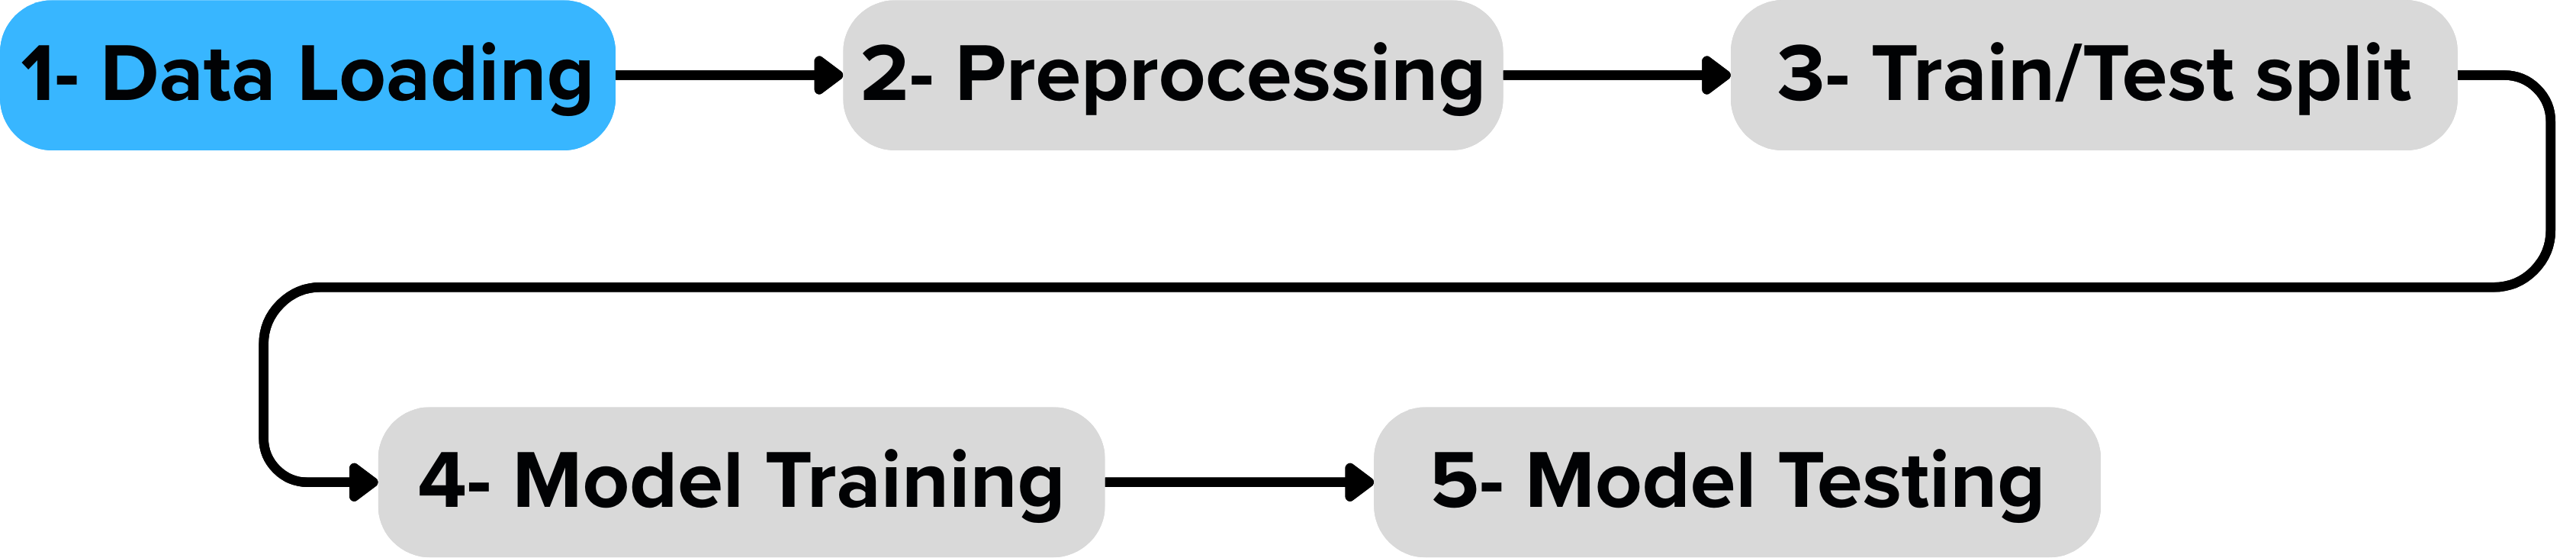

In [2]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Make plots look cleaner
sns.set()

In [3]:
# Load Dataset
df = pd.read_csv("raw_sales.csv")
# Display first 5 rows. If you want to display all rows, use df.head(-1)
df.head(-1)

,datesold,postcode,price,propertyType,bedrooms
0,2007-02-07 00:00:00,2607,525000,house,4
1,2007-02-27 00:00:00,2906,290000,house,3
2,2007-03-07 00:00:00,2905,328000,house,3
3,2007-03-09 00:00:00,2905,380000,house,4
4,2007-03-21 00:00:00,2906,310000,house,3
...,...,...,...,...,...
29574,2019-07-25 00:00:00,2612,475000,unit,2
29575,2019-07-25 00:00:00,2900,500000,unit,3
29576,2019-07-25 00:00:00,2612,560000,unit,2
29577,2019-07-26 00:00:00,2912,464950,unit,2


### Check Missing Values

In [4]:
# Check all values
print(df.isna())

       datesold  postcode  price  propertyType  bedrooms
0         False     False  False         False     False
1         False     False  False         False     False
2         False     False  False         False     False
3         False     False  False         False     False
4         False     False  False         False     False
...         ...       ...    ...           ...       ...
29575     False     False  False         False     False
29576     False     False  False         False     False
29577     False     False  False         False     False
29578     False     False  False         False     False
29579     False     False  False         False     False

[29580 rows x 5 columns]


In [5]:
print(df.isna().sum())

datesold        0
postcode        0
price           0
propertyType    0
bedrooms        0
dtype: int64


### Check duplicate rows

In [ ]:
# checking duplicate rows
df.duplicated()[df.duplicated()==True]

np.int64(0)

### No. of rows and columns

In [9]:
# finding number of rows and columns

print("Shape (rows, columns): ", df.shape,"\n")

print("number of rows: ", df.shape[0])
print("number of columns: ", df.shape[1])

Shape (rows, columns):  (29580, 5) 

number of rows:  29580
number of columns:  5


### Data type of columns

In [10]:
# viewing the data types of columns
df.dtypes

datesold        object
postcode         int64
price            int64
propertyType    object
bedrooms         int64
dtype: object

In [12]:
df['datesold'] = pd.to_datetime(df['datesold'], errors='coerce')

df.dtypes


datesold        datetime64[ns]
postcode                 int64
price                    int64
propertyType            object
bedrooms                 int64
dtype: object

In [13]:
# Statistical summary
df.describe(include='all')

,datesold,postcode,price,propertyType,bedrooms
count,29580,29580.000000,2.958000e+04,29580,29580.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,house,NaN
freq,NaN,NaN,NaN,24552,NaN
mean,2015-02-21 07:35:42.474645248,2730.249730,6.097363e+05,NaN,3.250169
min,2007-02-07 00:00:00,2600.000000,5.650000e+04,NaN,0.000000
25%,2013-02-05 00:00:00,2607.000000,4.400000e+05,NaN,3.000000
50%,2015-09-30 00:00:00,2615.000000,5.500000e+05,NaN,3.000000
75%,2017-07-26 00:00:00,2905.000000,7.050000e+05,NaN,4.000000
max,2019-07-27 00:00:00,2914.000000,8.000000e+06,NaN,5.000000


### Descriptive summary Statistics

### Univariate Analysis

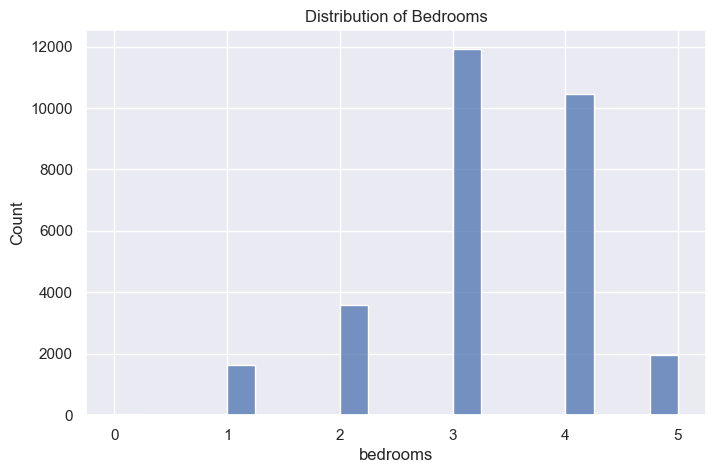

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df['bedrooms'], bins=20)
plt.title("Distribution of Bedrooms")
plt.show()


### Distribution of Revenue

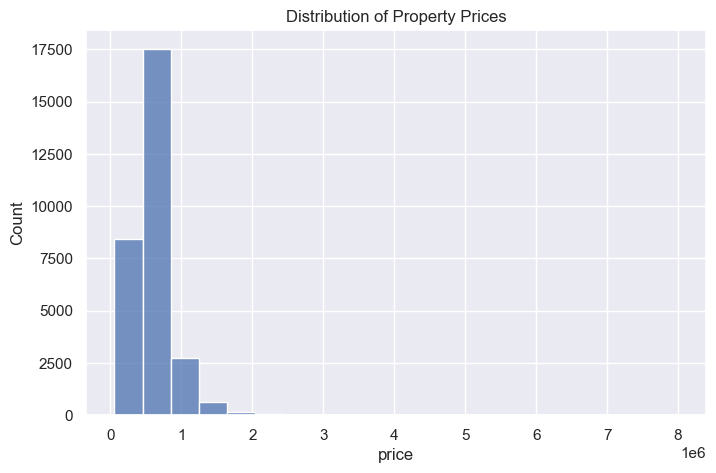

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=20)
plt.title("Distribution of Property Prices")
plt.show()

## Bivariate Analysis

### Revenue by Postcode


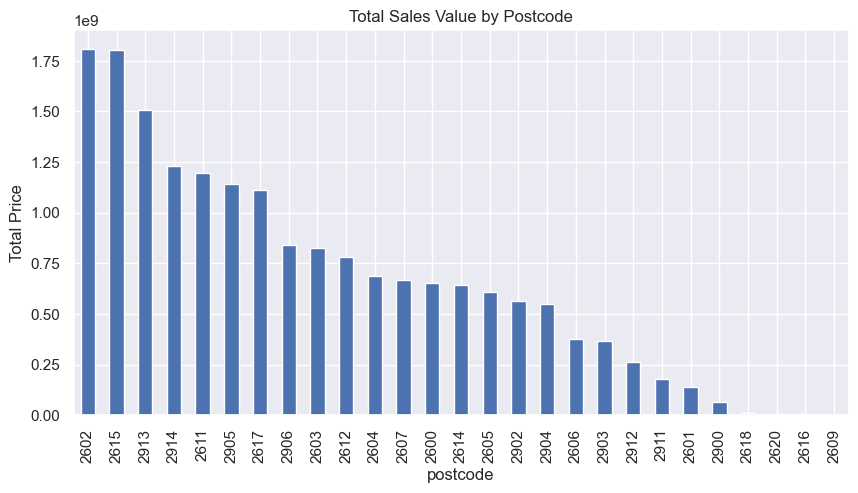

postcode
2602    1810955930
2615    1805156968
2913    1507706484
2914    1229405546
2611    1196958348
2905    1142556274
2617    1113910498
2906     838463151
2603     828056740
2612     780947453
2604     685204072
2607     669011863
2600     651881576
2614     644498013
2605     606141020
2902     563501086
2904     550768633
2606     375538612
2903     366845993
2912     260458247
2911     180474100
2601     140515676
2900      63453600
2618       9730000
2620       7469753
2616       4942000
2609       1447000
Name: price, dtype: int64

In [17]:
postcode_revenue = df.groupby('postcode')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
postcode_revenue.plot(kind='bar')
plt.title("Total Sales Value by Postcode")
plt.ylabel("Total Price")
plt.show()

postcode_revenue


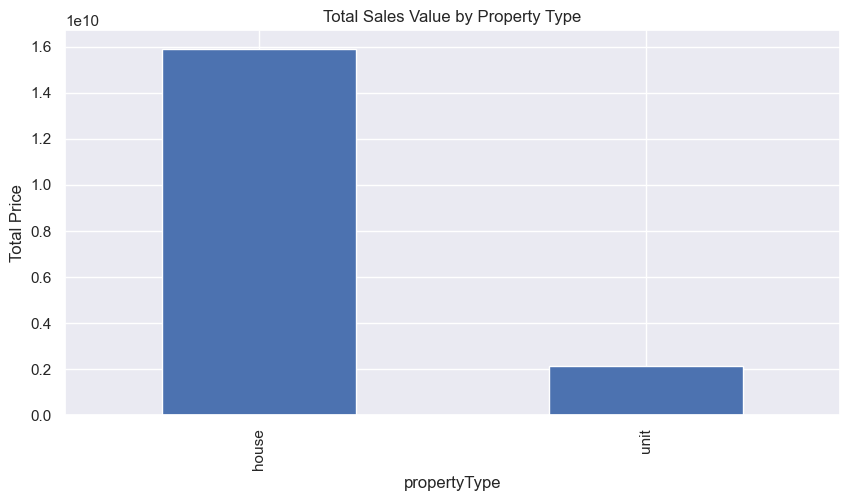

propertyType
house    15908618866
unit      2127379770
Name: price, dtype: int64

In [18]:
property_revenue = df.groupby('propertyType')['price'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,5))
property_revenue.plot(kind='bar')
plt.title("Total Sales Value by Property Type")
plt.ylabel("Total Price")
plt.show()

property_revenue

### Revenue by postcode

In [19]:
postcode_revenue.head(10)


postcode
2602    1810955930
2615    1805156968
2913    1507706484
2914    1229405546
2611    1196958348
2905    1142556274
2617    1113910498
2906     838463151
2603     828056740
2612     780947453
Name: price, dtype: int64

### Boxes vs Revenue Relationship

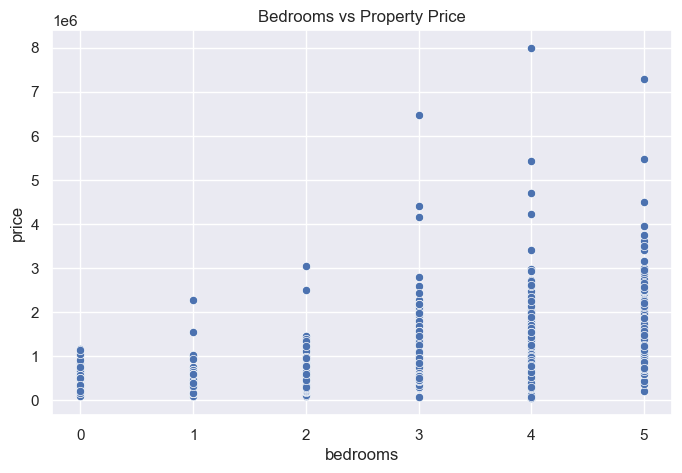

In [22]:
plt.figure(figsize=(8,5))
sns.scatterplot(x='bedrooms', y='price', data=df)
plt.title("Bedrooms vs Property Price")
plt.show()


### Correlation Matrix

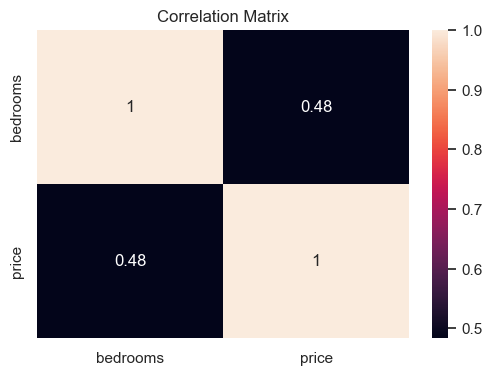

In [23]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['bedrooms', 'price']].corr(), annot=True)
plt.title("Correlation Matrix")
plt.show()


- Correlation close to 1 = strong positive relationship
- Close to 0 = weak relationship

## Time-Based Analysis
### Monthly Sales Trend

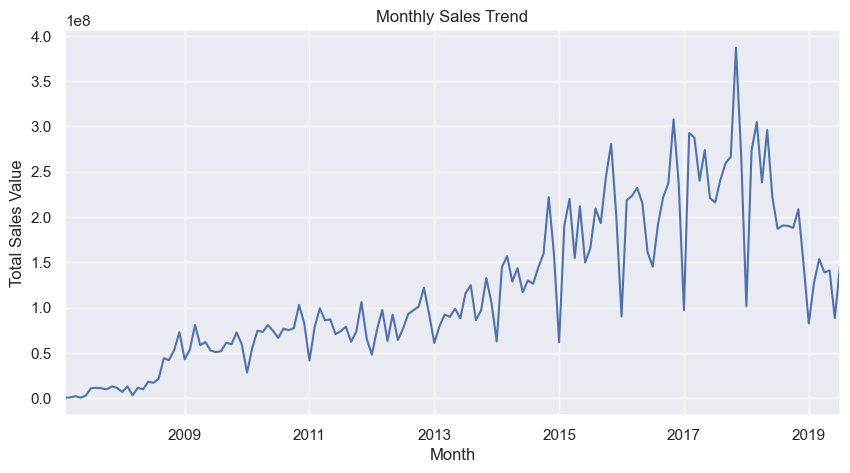

In [24]:
df['Month'] = df['datesold'].dt.to_period('M')

monthly_sales = df.groupby('Month')['price'].sum()

plt.figure(figsize=(10,5))
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Total Sales Value")
plt.show()


# Assignment

In this assignment, you will apply the EDA techniques learned in class to a dataset of your choice. You must submit the following to the assignment 1 folder.
1. Dataset file 
2. Dataset Description readme file
2. Jupyter Notebook
